## Step 0: Installation and setup

In [262]:
# importing the libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check for GPU availability
if tf.config.list_physical_devices("GPU"):
  print("sd")
else:
  print("Sad")

sd


## Step 1: Getting the data ready

# Content:
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [263]:
# Importing our dataset
credit_card = pd.read_csv("/content/drive/MyDrive/credit/credit/creditcard.csv")
print(credit_card.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [264]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Step 2: Data Preprocessing

In [265]:
# Checking for missing values
credit_card.shape

(284807, 31)

In [266]:
credit_card.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [267]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [268]:
# Class value counts
credit_card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [269]:
fraud = credit_card[credit_card['Class']==1]
non_fraud = credit_card[credit_card['Class']==0]

In [270]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [271]:
# To balance the data set there should be equal number of each case so 492 random non-fraud transactions should be picked
non_fraud_t = non_fraud.sample(n=492)

In [272]:
non_fraud_t.shape

(492, 31)

In [273]:
ds = fraud.append(non_fraud_t, ignore_index=True)

<ipython-input-273-b48e23f2ff66>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = fraud.append(non_fraud_t, ignore_index=True)


In [274]:
ds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,71475.0,1.306410,-0.823442,1.237299,-0.808413,-1.513531,0.006940,-1.373522,0.167971,-0.507392,...,0.480885,1.316772,-0.153815,0.077439,0.344765,-0.043596,0.055115,0.023504,24.99,0
980,117210.0,1.924767,-1.485376,-1.312014,-1.076583,-0.550573,0.190674,-0.759042,-0.008904,-0.155465,...,0.272022,0.472115,-0.137435,-1.355971,-0.078743,-0.128621,-0.034086,-0.046712,168.00,0
981,126496.0,0.131980,0.980410,-0.560530,-0.760831,1.206592,-0.269628,0.857700,0.058799,-0.293570,...,-0.318041,-0.793897,0.023985,0.094050,-0.389019,0.121627,0.219170,0.070013,0.99,0
982,62455.0,-1.543491,1.466806,0.707235,-0.753309,-0.491038,-0.233638,-0.149256,1.105748,-0.381492,...,-0.062640,-0.208374,0.055433,0.025858,-0.225509,0.315800,0.170473,0.100060,4.00,0


In [275]:
ds['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [276]:
X = ds.drop('Class', axis=1)
y = ds['Class']

In [277]:
X.shape, y.shape

((984, 30), (984,))

In [278]:
# Spliting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [279]:
X_test.shape, y_train.shape

((197, 30), (787,))

In [280]:
# Dedicating a part of training data into validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)

In [281]:
X_val.shape, X_train.shape

((158, 30), (629, 30))

In [282]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [283]:
%pip install update pandas

In [284]:
X_val.shape, X_train.shape

((158, 30), (629, 30))

In [285]:
# Reshape the dataset
X_train = X_train.reshape(629, 30, 1)
X_val = X_val.reshape(158, 30, 1)
X_test = X_test.reshape(197, 30, 1)

## Step 3: Building the model

In [286]:
# Defining an object
model = tf.keras.models.Sequential()

In [287]:
# First CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same',activation='relu', input_shape = (30,1)))

# Batch normalization
model.add(tf.keras.layers.BatchNormalization())

# Maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [288]:
# Second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same',activation='relu'))

# Batch normalization
model.add(tf.keras.layers.BatchNormalization())

# Maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [289]:
# Flatten layer
model.add(tf.keras.layers.Flatten())

In [290]:
# First dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [291]:
# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [292]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 30, 32)            96        
                                                                 
 batch_normalization_10 (Bat  (None, 30, 32)           128       
 chNormalization)                                                
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 15, 32)           0         
 g1D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 15, 32)            0         
                                                                 
 conv1d_11 (Conv1D)          (None, 15, 64)            4160      
                                                                 
 batch_normalization_11 (Bat  (None, 15, 64)          

## Step 4: Training the model

In [293]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt,
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [294]:
history = model.fit(X_train,y_train, epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
20/20 [==============================] - 3s 19ms/step - loss: 1.0418 - accuracy: 0.5135 - val_loss: 0.6536 - val_accuracy: 0.6835
Epoch 2/25
20/20 [==============================] - 0s 8ms/step - loss: 0.7139 - accuracy: 0.6598 - val_loss: 0.6363 - val_accuracy: 0.7152
Epoch 3/25
20/20 [==============================] - 0s 8ms/step - loss: 0.5751 - accuracy: 0.7472 - val_loss: 0.6257 - val_accuracy: 0.6709
Epoch 4/25
20/20 [==============================] - 0s 8ms/step - loss: 0.5040 - accuracy: 0.7663 - val_loss: 0.6175 - val_accuracy: 0.6392
Epoch 5/25
20/20 [==============================] - 0s 8ms/step - loss: 0.4309 - accuracy: 0.8156 - val_loss: 0.6090 - val_accuracy: 0.6013
Epoch 6/25
20/20 [==============================] - 0s 8ms/step - loss: 0.4384 - accuracy: 0.8251 - val_loss: 0.5999 - val_accuracy: 0.6013
Epoch 7/25
20/20 [==============================] - 0s 8ms/step - loss: 0.3807 - accuracy: 0.8490 - val_loss: 0.5873 - val_accuracy: 0.6329
Epoch 8/25
20/20 [=

In [295]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

7/7 [==============================] - 0s 2ms/step


In [296]:
y_test.shape

(197,)

## Step 5: Evaluating the model

<Axes: >

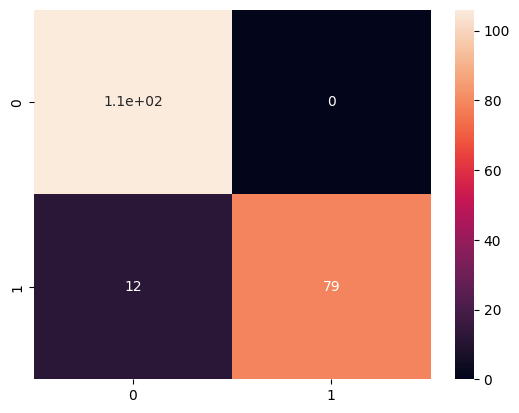

In [297]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [298]:
accuracy_score(y_test, y_pred)

0.9390862944162437

In [299]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       106
           1       1.00      0.87      0.93        91

    accuracy                           0.94       197
   macro avg       0.95      0.93      0.94       197
weighted avg       0.95      0.94      0.94       197



In [300]:
# Learning curve
def learning_curve(history, epoch):

  #training vs validation accuracy
  epoch_range = range(1, epoch + 1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()

  #training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()

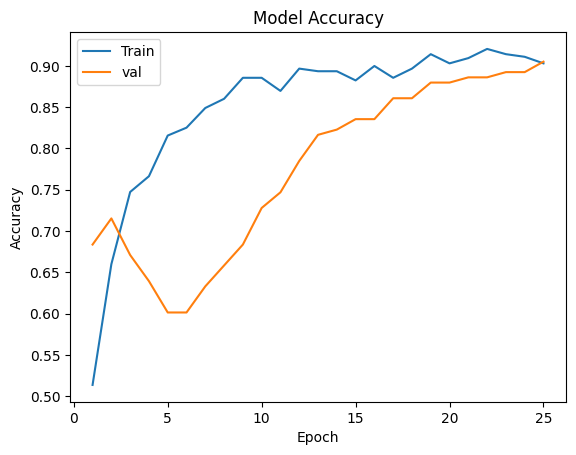

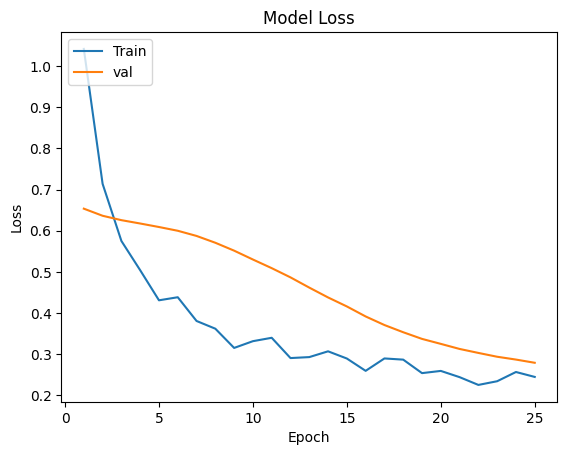

In [301]:
learning_curve(history, 25)